# WINE CLASSIFICATION USING NEURAL NETWORKS

An example of a multivariate data type classification problem.
By Jaime Ortegón
Inspired on the work by Miloš Dodović, Faculty of Organizational Sciences, University of Belgrade


## Introduction
Classification is one of the most frequently encountered decision making tasks of human activity. A classification problem occurs when an object needs to be assigned into a predefined group or class based on a number of observed attributes related to that object. 

In addition to classification by neural networks, there are other statistical methods dealing with the problem of classification, such as discriminant analysis. One major limitation of the statistical models is that they work well only when the underlying assumptions are satisfied. On the other hand advantage of neural networks lies in the following aspects. First, they can adjust themselves to the data without any explicit specification of functional or distributional form for the underling model, because they are data driven self-adaptive methods. Second, neural networks are nonlinear models, which makes them flexible in modeling real world complex relationships. Finally, neural networks can approximate any function with arbitrary accuracy.

## Workflow

Based on the book Data Science Solutions, it can be seen "Seven stages of data science solutions workflow" 

1. Question. Problem. Solution. Before starting a data science project we must ask relevant questions specific to our project domain and datasets. 
2. Acquire. Search. Create. This stage involves data acquisition strategies including searching for datasets on popular data sources or internally within your organization. 
3. Wrangle. Prepare. Cleanse. The data wrangle stage prepares and cleanses our datasets for our project goals.
4. Analyze. Patterns. Explore. The analyze stage explores the given datasets to determine patterns, correlations, classification, and nature of the dataset. 
5. Model. Predict. Solve. The model stage uses prediction and solution algorithms to train on a given dataset and apply this training to solve for a given problem.
6. Visualize. Report. Present. The visualization stage can help data wrangling, analysis, and modeling stages. Data can be visualized using charts and plots suiting the characteristics of the
dataset and the desired results.
7. Supply. Products. Services. Once we are ready to monetize our data science solution or derive further return on investment from our projects, we need to think about distribution and data
supply chain. 

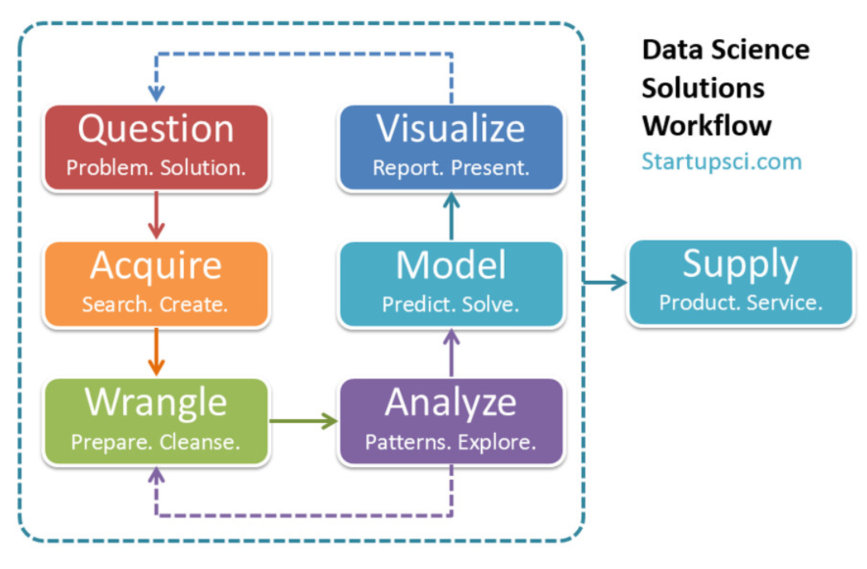


## Introduction to the problem

### Question 
The purpose of this test is to determine classes for italian wine derived from the same area.

### Acquire
The dataset is available on the Nueroph examples [webpage](http://neuroph.sourceforge.net/tutorials/wines3/WineClassificationUsingNeuralNetworks.html).

Data set contains 178 instances. Each instance has one of 3 possible classes: 1,2 and 3.

Data list contains 13 different attributes used for comparison, and 3 different classes of output.

The attributes are: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines and Proline.


By using Pandas library, is possible to view the data as a table and also perform basic analysis. 

In [ ]:
import numpy
import pandas as pd

url = 'http://neuroph.sourceforge.net/tutorials/wines3/download/Wine%20testing%20data/wine.data'
# Download and read the data
df = pd.read_csv(url,names=['Type','Alcohol', 'Malic_acid', 'Ash',
'Alcalinity_ash', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoid', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline'])
# See the first rows (samples)
df.head()

### Wrangle

With matplotlib interacting with pandas, we can generate an histogram of the data to see the distribution of each feature.

In [ ]:
from matplotlib import pyplot as plt
df.hist()
plt.show()

Let's make sure that our data is complete

In [ ]:
print(df.isnull().any())

Using the describe function we can learn several aspects of our dataset.

* There are 178 samples (count) available in our dataset.
* The classifications (target) include numerical ids 1, 2, and 3.
* The dataset variables contain variety of numerical values distributed across different ranges.


In [ ]:
df.describe()

#### Data Normalization

Any neural network must be trained before it can be considered intelligent and ready to use. Neural networks are trained using training sets, and now a training set will be created to help us with the wine classification problem. 

To have a good training, we first need to normalize the data.

 $ B = \left( \frac{A-min(A)}{max(A)-min(A)}\right) * (D-C)+C$

where B is the standardized value, A the given value, and D and C determine the range in which we want our value to be. In this case, D= 0 and C=1. 

This can be coded directly or using sklearn and its functions.

In [ ]:
#normalized_df=(df-df.min())/(df.max()-df.min())
from sklearn import preprocessing

# Normalization to range [-1,1]
df_scaled = preprocessing.scale(df)
# Convert to a pandas dataframe again
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
# We do not want to scale the 'Type' column, since it represent the class
df_scaled['Type'] = df['Type']

df_scaled.describe()

#### One-hot encoding
One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element.

For instance, $[0, 0, 0, 1, 0]$ and $[1 ,0, 0, 0, 0]$ could be some examples of one-hot vectors. A similar technique to this one, also used to represent data, would be dummy variables in statistics.

We can convert the values in a pandas data column into one-hot encoded vectors using the get_dummies() function.

In [ ]:
#One-hot encoding
y = pd.get_dummies(df_scaled.Type, prefix='Type')
y.head()

One of the major advantages of neural networks is their ability to generalize. This means that a trained network could classify data from the same class as the learning data that it has never seen before. In real world applications developers normally have only a small part of all possible patterns for the generation of a neural network. To reach the best generalization, the data set should be split into three parts: validation, training and testing set.

The validation set contains a smaller percentage of instances from the initial data set, and is used to determine whether the selected network architecture is good enough. If validation was successful, only then we can do the training. The training set is applied to the neural network for learning and adaptation. The testing set is then used to determine the performance of the neural network by computation of an error metric.

This validating-training-testing approach is the first, and often the only, option system developers consider for the assessment of a neural network. The assessment is accomplished by the repeated application of neural network training data, followed by an application of neural network testing data to determine whether the neural network is acceptable.

At least, each dataset should be splitted in train and test set. This can be achieved with the functions included in sklearn.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.loc[:, df_scaled.columns != 'Type']
#Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model

Now we need to create neural network. In this experiment, we will analyze several architecture. Each neural network which we create will be type of Multi Layer Perceptron and each will differ from one another according to parameters of Multi Layer Perceptron.

On the first attemp, the neural net have 1 hidden layer with 3 neurons. The activation function is 'Sigmoid' which sklearn refers as 'logistic'. The solver is stochastic gradient descent (SGD) in order to use 'Backpropagation with Momentum'. The momentum is added to speed up the process of learning and to improve the efficiency of the algorithm.

Other learning parameters is the learning rate used to control the step size when weights are iteratively adjusted.

In this first case the values are 0.2 for learning rate and 0.7 for momentum.

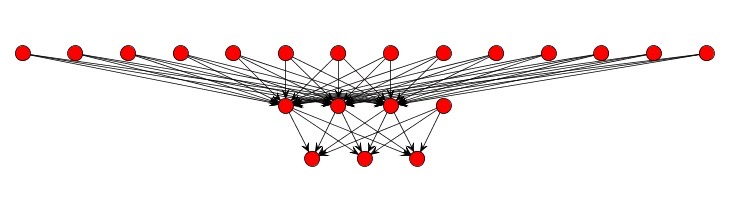

In [ ]:
from sklearn.neural_network import MLPClassifier

# model definition
mpl = MLPClassifier(hidden_layer_sizes=(3,), solver='sgd', max_iter=1000, activation='logistic', momentum=0.7, learning_rate_init=0.2)
# train
mpl.fit(X_train,y_train)
print(mpl.loss_)
plt.plot(mpl.loss_curve_)

### Visualize

After modeling and training, the results should be show and analyzed in order to see the performance of the model. 

In [ ]:
print('Accuracy in the training set',mpl.score(X_train,y_train))
print('Accuracy in the testing set',mpl.score(X_test,y_test))

### Recycle

Now, the scientist should get back to previous steps to perform further preprocessing of the data, change the model, change the learning parameters, and more.

Since a network is very adjustable to different conditions, it will be trained with different architectures and parameters of training. These results can give us data about network's architecture and it's behaviour under different circumctances. 

The following table summaries architectures and training parameters, 
You should complete corresponding errors. You should highlight the best solution.


| Attempt | Hidden_neurons | Hidden_layers | Learning_rate | Momentum | Loss|
| :---: | :---: | :---: | :---: | :---: | :---: |
|1|1|1|0.2|0.7|
|2|1|1|0.1|0.5|
|3|2|1|0.2|0.7|
|4|2|1|0.1|0.5|
|5|3|1|0.2|0.7|
|6|3|1|0.1|0.5|
|7|6|1|0.2|0.7|
|8|6|1|0.1|0.5|
|9|6|1|0.5|0.5|
|10|8|1|0.2|0.7|
|11|8|1|0.1|0.5|
|12|10|1|0.2|0.7|
|13|10|1|0.1|0.5|
|14|1, 1|2|0.2|0.7| 	
|15|1, 1|2|0.1|0.5|
|16|3, 1|2|0.2|0.7| 
|17|5, 1|2|0.2|0.7| 
|18|3, 3|2|0.2|0.7| 
|19|5, 3|2|0.2|0.7| 
|20|8, 3|2|0.2|0.7| 

 